# CAPSTONE PROJECT - WEBSCRAPPING AND EDA

In [2]:
! pip install fake_useragent

Processing c:\users\opera\appdata\local\pip\cache\wheels\a0\b8\b7\8c942b2c5be5158b874a88195116b05ad124bac795f6665e65\fake_useragent-0.1.11-py3-none-any.whl


In [1]:
# importing necessary libraries to process website scrapping, extracting data and performing EDA
import requests
import bs4
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# In the below project I'm going to scrap laptop as a product from Flipkart. I'm going to analyze different features of 
# different laptops and make a comparison among them. My analysis will help an user decide which laptop to buy with particular  
# features and within a specified budget.

product_name = 'laptop' 

In [3]:
# creating below empty lists to store required data from the unstructured scrapped page.

count = 0 
products = [] # list to store product title
prices = [] # list to store product price
ratings = [] # list to store product ratings
cpu = [] # list to store CPU specifications
ram = [] # list to store RAM specifications 
os = [] # list to store Operating System specifications
hd = [] # list to store storage specifications 
display = [] # list to store display specifications

df = pd.DataFrame() # initializaion of Dataframe


In [4]:
# Creating user agent before scrapping the website 

user_agent = UserAgent() #Dummy user agent

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.11
Traceback (most recent call last):
  File "C:\Users\opera\anaconda3\lib\site-packages\fake_useragent\utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "C:\Users\opera\anaconda3\lib\site-packages\fake_useragent\utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


In [5]:
# Here is the page of Flipkart website I'm going to scrap : https://www.flipkart.com/search?q=laptop&page=1

for i in range(1, 7): #limiting scrap upto 7 pages
    url = "https://www.flipkart.com/search?q={0}&page={1}"
    url = url.format(product_name, i)
     
    page = requests.get(url, headers={"user-agent": user_agent.chrome})
    
    html_page = page.content 
    
    bs_page = bs4.BeautifulSoup(html_page, "html.parser")
    
    for containers in bs_page.findAll('a', {'class':'_1fQZEK'}):
        name = containers.find('div', attrs={'class':'_4rR01T'})
        price = containers.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        rating = containers.find('div', attrs={'class':'_3LWZlK'})
        
        specification = containers.find('div', attrs={'class':'fMghEO'})
        
        for col in specification:
            col=col.find_all('li', attrs ={'class':'rgWa7D'})
            cput=col[0].text
            ramt=col[1].text
            ost=col[2].text
            hdt=col[3].text
            displayt=col[4].text
        
        # Adding products to the empty lists created in above cell.
        products.append(name.text)
        prices.append(price.text) 
        ratings.append(rating.text) if type(rating) == bs4.element.Tag else ratings.append('NaN') 
        cpu.append(cput)
        ram.append(ramt)
        os.append(ost)  
        hd.append(hdt)  
        display.append(displayt)
        
        count = count + 1  
        
    df = pd.DataFrame({'Product Name': products, 'CPU': cpu, 'RAM': ram, 'OS': os, 'HD Capacity': hd, 'Display': display,'Price': prices,'Ratings': ratings})
    
    #print(page_soup.prettify()) # For tag identification and debugging purpose

print('No. of rows searched', count)
 

No. of rows searched 144


In [18]:
# Here is the top five rows of data.

df.head()

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Ratings
0,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,"₹41,890",4.4
1,DELL Inspiron Ryzen 3 Dual Core 3250U - (8 GB/...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inches) Display,"₹39,990",4.1
2,Lenovo IdeaPad Slim 3i (2021) Core i3 11th Gen...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,"₹45,990",4.4
3,HP 15s Core i3 10th Gen - (8 GB/1 TB HDD/Windo...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 Inch) Display,"₹40,990",4.1
4,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,"₹39,990",4.1


In [19]:
df.Display.head()

0        35.56 cm (14 inch) Display
1    39.62 cm (15.6 inches) Display
2        35.56 cm (14 inch) Display
3      39.62 cm (15.6 Inch) Display
4      39.62 cm (15.6 inch) Display
Name: Display, dtype: object

In [23]:
df.Display.apply(lambda x: int(x[10:12]))

ValueError: invalid literal for int() with base 10: ''

In [11]:
df['Product Name'].value_counts()

Lenovo ThinkPad E15 Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home) E15 Thin and Light Laptop           4
Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB HDD/Windows 10 Home) 15IML05 Thin and Light Laptop            4
ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...    4
ASUS VivoBook Flip 14 Core i3 10th Gen - (4 GB/512 GB SSD/Windows 10 Home) TP412FA-EC372TS 2 in 1 Lapt...    3
Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home) IdeaPad 3 15ITL6 Th...    3
                                                                                                            ..
ASUS VivoBook Flip Ryzen 7 Octa Core - (8 GB/512 GB SSD/Windows 10 Home) TM420UA-EC701TS 2 in 1 Laptop       1
ASUS TUF Gaming F17 (2021) Core i5 11th Gen - (8 GB/1 TB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeFo...    1
ASUS Ryzen 5 Quad Core - (8 GB/1 TB HDD/Windows 10 Home) M415DA-EB502TS Laptop                               1
D

In [12]:
# Identify rows with wrongly positioned data 
# i.e. a particular data misplaced under a different column

a = df[(~df['CPU'].str.contains('Processor'))|(~df['RAM'].str.contains('RAM'))|(~df['OS'].str.contains('Operating'))|(~df['HD Capacity'].str.contains('GB|TB'))].index
a # Save index information of such rows


Int64Index([6, 17, 78, 89, 210, 213], dtype='int64')

In [13]:
df = df.drop(a, axis=0)  ## Dropping rows with wrongly positioned data elements

In [14]:
df['Price'] = df['Price'].str.lstrip('₹')
df['Price'] = df['Price'].replace({',':''}, regex=True)
df.head()                     

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Ratings
0,MSI Prestige 14 Core i7 10th Gen - (16 GB/512 ...,Intel Core i7 Processor (10th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,84990,4.1
1,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,41890,4.4
2,Lenovo APU Dual Core A9 A99425 - (4 GB/1 TB HD...,AMD APU Dual Core A9 Processor,4 GB DDR4 RAM,64 bit DOS Operating System,1 TB HDD,35.56 cm (14 inch) Display,28000,4.6
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/1 TB...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,39990,4.3
4,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,64056,4.5


In [68]:
df.describe() # Describe data after cleaning and dtype conversion

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Ratings
count,142,142,142,142,142,142,142,142
unique,112,21,10,4,7,9,75,16
top,Lenovo Ideapad 3 Ryzen 3 Dual Core 3250U - (4 ...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,64990,4.3
freq,5,39,78,134,60,68,8,24


In [69]:
df.dtypes

Product Name    object
CPU             object
RAM             object
OS              object
HD Capacity     object
Display         object
Price           object
Ratings         object
dtype: object

In [70]:
# Changing data type of column 6 and 7 to float

for i in range(6, 8, 1):
    df.iloc[:, i] = df.iloc[:, i].astype(float).copy()
    

In [71]:
df.dtypes ## Check data type of columns

Product Name     object
CPU              object
RAM              object
OS               object
HD Capacity      object
Display          object
Price           float64
Ratings         float64
dtype: object

In [72]:
# Save cleaned and processed data to a cSV file

df.to_csv('WebScrapingLaptops.csv', index=False)


In [73]:
# Loading CSV file for analysis

df1 = pd.read_csv('WebScrapingLaptops.csv')
df1.head()

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Ratings
0,Dell Inspiron 3505 Ryzen 3 Dual Core 3250U - (...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,34790.0,4.3
1,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,47990.0,4.3
2,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,36990.0,4.3
3,HP 15 Ryzen 3 Dual Core 3200U - (4 GB/1 TB HDD...,AMD Ryzen 3 Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,31490.0,4.0
4,MSI Modern 14 Ryzen 5 Hexa Core 4500U - (8 GB/...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,51990.0,4.6


In [74]:
df1.isnull().sum() # Check for null values

Product Name     0
CPU              0
RAM              0
OS               0
HD Capacity      0
Display          0
Price            0
Ratings         22
dtype: int64

In [75]:
df1.isna().sum() # checking for NaN values

Product Name     0
CPU              0
RAM              0
OS               0
HD Capacity      0
Display          0
Price            0
Ratings         22
dtype: int64

In [76]:
# Complete information about the dataset

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  142 non-null    object 
 1   CPU           142 non-null    object 
 2   RAM           142 non-null    object 
 3   OS            142 non-null    object 
 4   HD Capacity   142 non-null    object 
 5   Display       142 non-null    object 
 6   Price         142 non-null    float64
 7   Ratings       120 non-null    float64
dtypes: float64(2), object(6)
memory usage: 9.0+ KB


In [77]:
# Removing all NaN rows from data frame

df1.dropna(axis=0, inplace=True)

In [78]:
# Dataset after removing NaN values

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 141
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  120 non-null    object 
 1   CPU           120 non-null    object 
 2   RAM           120 non-null    object 
 3   OS            120 non-null    object 
 4   HD Capacity   120 non-null    object 
 5   Display       120 non-null    object 
 6   Price         120 non-null    float64
 7   Ratings       120 non-null    float64
dtypes: float64(2), object(6)
memory usage: 8.4+ KB


In [85]:
# Save cleaned and processed data to a cSV file

df1.to_csv('WebScrapingLaptopsFinal.csv', index=False)


In [86]:
df2 = pd.read_csv('WebScrapingLaptopsFinal.csv')
df2.head()

,Product Name,CPU,RAM,OS,HD Capacity,Display,Price,Ratings
0,Dell Inspiron 3505 Ryzen 3 Dual Core 3250U - (...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,34790.0,4.3
1,HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,47990.0,4.3
2,Asus Core i3 10th Gen - (4 GB/512 GB SSD/Windo...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,36990.0,4.3
3,HP 15 Ryzen 3 Dual Core 3200U - (4 GB/1 TB HDD...,AMD Ryzen 3 Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,31490.0,4.0
4,MSI Modern 14 Ryzen 5 Hexa Core 4500U - (8 GB/...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,51990.0,4.6


In [87]:
## Describing data after cleaning and dtype conversion

df2.describe() 

,Price,Ratings
count,120.000000,120.000000
mean,61707.875000,4.319167
std,32334.675517,0.307141
min,21990.000000,3.600000
25%,39580.000000,4.175000
50%,52490.000000,4.300000
75%,73240.000000,4.500000
max,182990.000000,5.000000


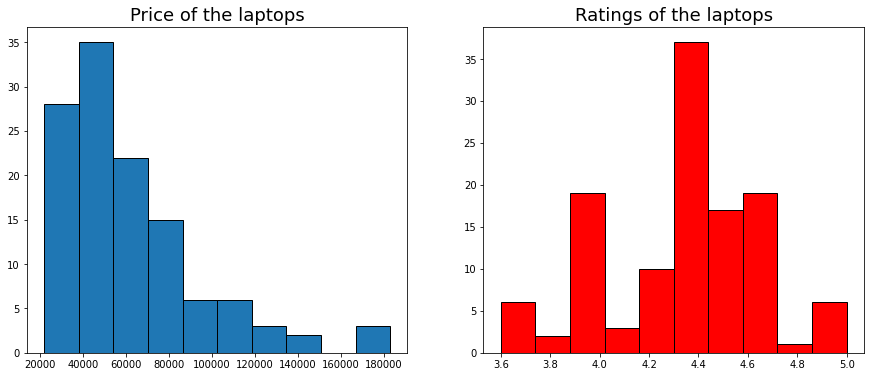

In [88]:
# Histogram of Price and Rating 

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))
ax[0].hist(df2['Price'], bins= 10, edgecolor = 'k')
ax[0].set_title('Price of the laptops', fontsize=18)
ax[1].hist(df2['Ratings'], bins= 10, edgecolor = 'k', color= 'red')
ax[1].set_title('Ratings of the laptops', fontsize=18);

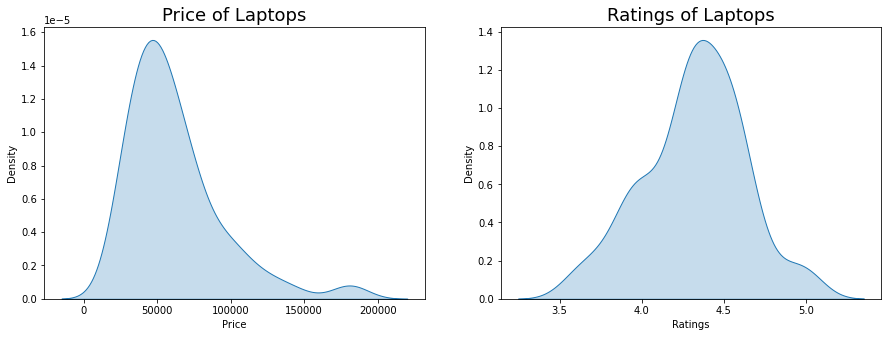

In [89]:
# KDE plot showing price and ratings

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(x='Price',  data = df2, shade = True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price of Laptops', fontsize=18)
plt.subplot(1,2,2)
sns.kdeplot(x='Ratings',  data = df2, shade = True)
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.title('Ratings of Laptops', fontsize=18)
plt.show();

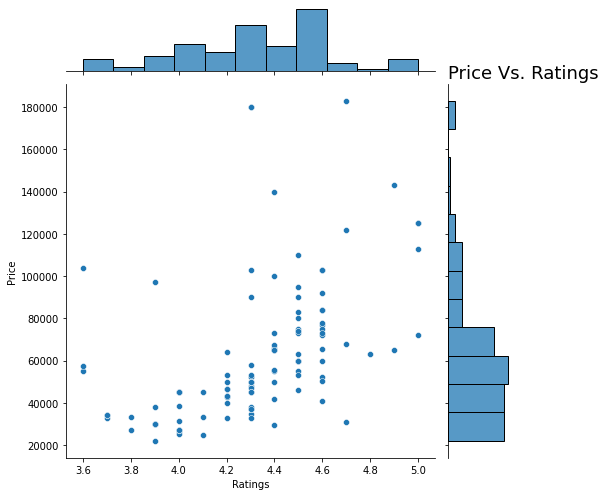

In [90]:
# Joint plot showing distribution of ratings over price range

import warnings

warnings.filterwarnings('ignore')

sns.jointplot("Ratings", "Price", data=df2, height=7)
plt.title('Price Vs. Ratings', fontsize=18, loc='left')
plt.show();

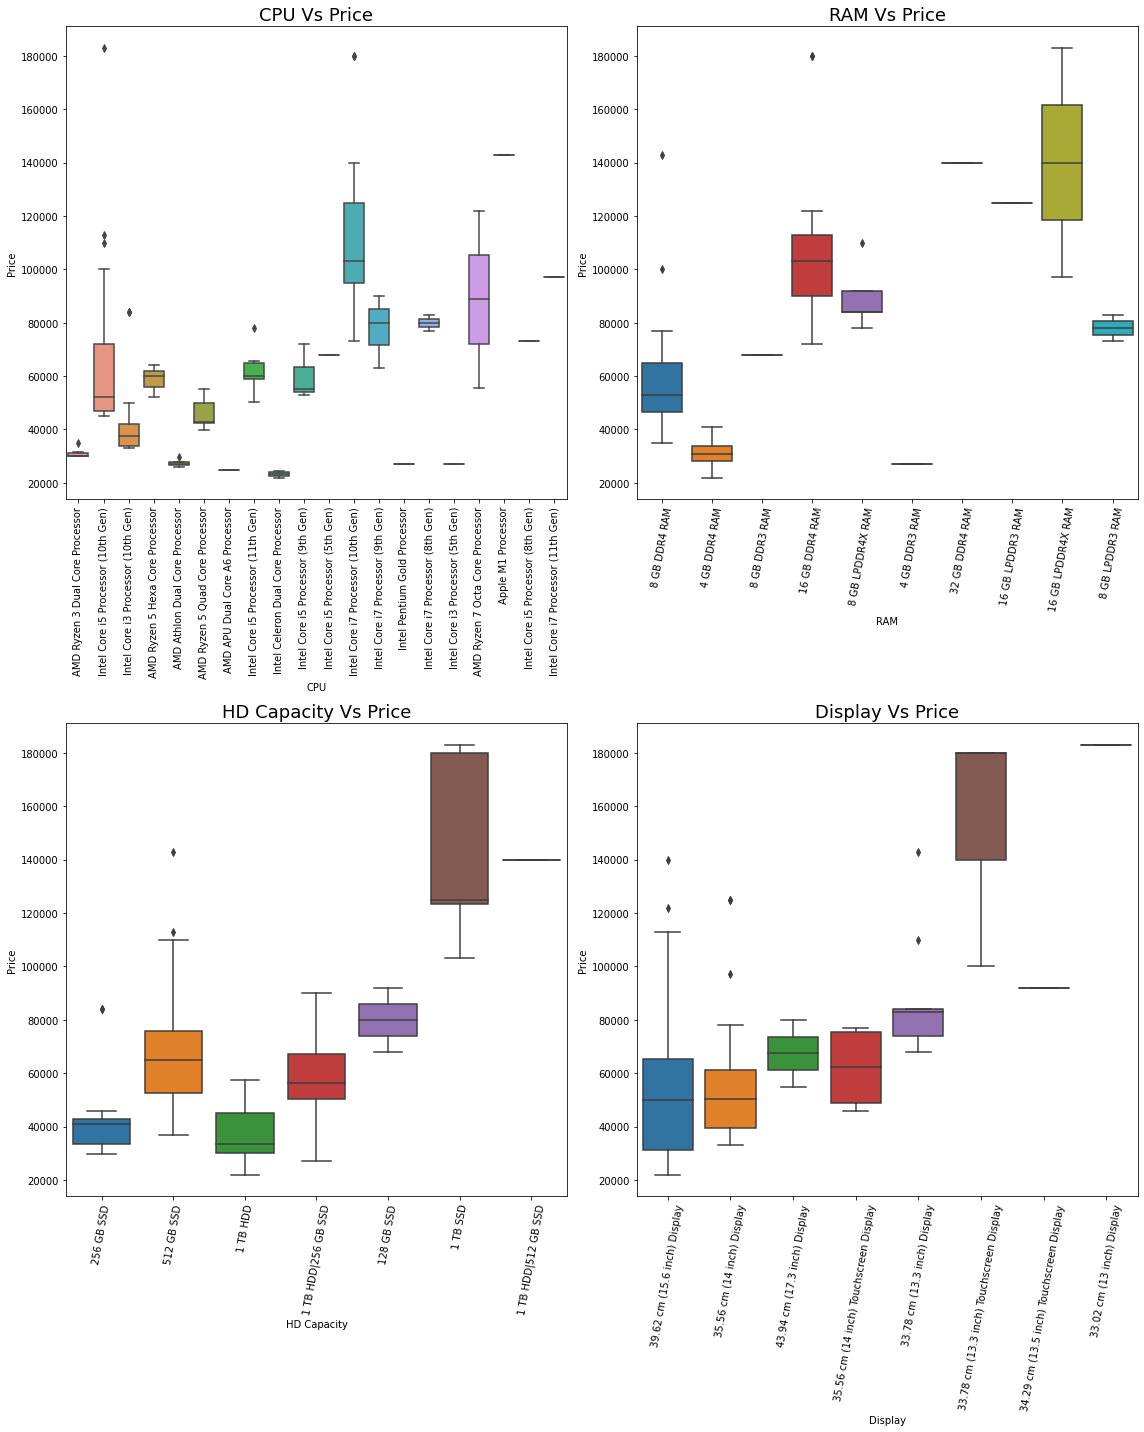

In [91]:
# The box plot here gives us a detailed visualization about the price range of different configuration of laptops.

plt.figure(figsize=(16,20))
plt.subplot(2,2,1)
sns.boxplot(x=df2['CPU'],y=df2['Price'],data=df2)
plt.xlabel('CPU')
plt.ylabel('Price')
plt.title('CPU Vs Price', fontsize=18)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.boxplot(x=df2['RAM'],y=df2['Price'],data=df2)
plt.xlabel('RAM')
plt.ylabel('Price')
plt.title('RAM Vs Price', fontsize=18)
plt.xticks(rotation=80)

plt.subplot(2,2,3)
sns.boxplot(x=df2['HD Capacity'],y=df2['Price'],data=df2)
plt.xlabel('HD Capacity')
plt.ylabel('Price')
plt.title('HD Capacity Vs Price', fontsize=18)
plt.xticks(rotation=80)
plt.subplot(2,2,4)
sns.boxplot(x=df2['Display'],y=df2['Price'],data=df2)
plt.xlabel('Display')
plt.ylabel('Price')
plt.title('Display Vs Price', fontsize=18)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show();

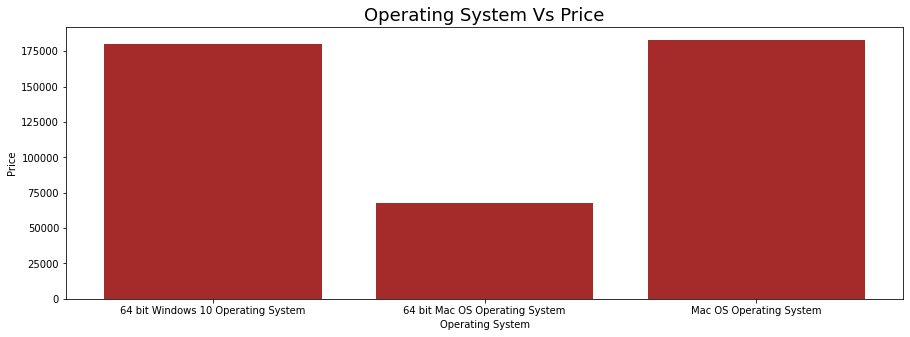

In [92]:
# Below bar graph shows operating systems available for different price range.

plt.figure(figsize=(15, 5))
plt.bar(df2['OS'], df2['Price'], color='brown')
plt.xticks(rotation=0)
plt.xlabel('Operating System')
plt.ylabel('Price')
plt.title('Operating System Vs Price', fontsize=18)
plt.show()